<h2><p style='text-align: center;'>Eduardo Vieira</p></h2>
<p style='text-align: center;'>Universidad Central de Venezuela <br>
Escuela de Ingeniería Mecánica <br>
eduardo.vieira@ucv.ve<br>
Profesor: Arturo Gil</p>

<h1> MODELO DINÁMICO DE ROBOT Móvil DE TRACCIÓN TRASERA MEDIANTE RESTRICCIONES NO-HOLÓNOMAS </h1>
<br>
__Se tiene:__ El siguiente vehículo que se mueve en el plano $xy$, el mismo puede suministrar una velocidad $v(t)$ y girar sus ruedas delanteras un ángulo $\psi$ <br>
<img src="Vehiculo_traccion_trasera.png">
<br>
__Se pide:__
<ul>
<li>1.    Determinar el modelo dinámico del sistema (ecuaciones que permitan describir la cinemática del vehículo).</li>
<li>2.    Diseñar un algoritmo que permita describir el sistema en el tiempo  partir de las variables de control $v(t)$ y $\psi(t)$.</li>
<li>3.    Realizar la representación para varias funciones $v(t)$ y $\psi(t)$.</li>
</ul>

<h2><p style='text-align: center;'>Código en Python</p></h2>

In [1]:
#----- Desde aqui no se puede graficar porque sage utiliza una version muy vieja de matplotlib
#----- Para realizar los gráficos es necesario descargar y ejecutar localmente
#----- Recomiendo usar anaconda: http://continuum.io/downloads

import numpy as np # Importamos la libreria numerica de python
import matplotlib.pyplot as plt # Importamos la libreria para realizar grficos
from __future__ import division
%matplotlib inline                                     
#plt.style.use('ggplot') # Se usa el estilo ggplot     # <----- Descomentar para graficar
t_i = 0 # Tiempo inicial [s]
t_f = 5 # Tiempo final [s]
n = 10000 # Numero de iteraciones
t = np.linspace(t_i, t_f, n) # Se crea el vector t
dt = (t_f - t_i) / n # El diferencial de tiempo
l = 2 # La longitud l
fact = np.pi / 180 # Factor de conversion
def posicion(v,psi, theta_i, x_i,y_i): # Funcion que grafica el comportamiento del vehiculo
    theta = np.zeros(n)
    theta[0] = theta_i
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = x_i
    y[0] = y_i
    for i in range(n-1):
        if(psi[i]>np.pi/2-0.001):
            psi[i] = np.pi / 2 - 0.001
        if psi[i]<-np.pi/2+0.001:
            psi[i] = -np.pi / 2 + 0.001
        theta[i+1] = theta[i] + (v[i] / l)*np.tan(psi[i+1]) * dt
        x[i+1] = x[i] + v[i] * np.cos(theta[i]) * dt
        y[i+1] = y[i] + v[i] * np.sin(theta[i]) * dt
    grafico = plt.figure(figsize=(20,10))
    pos_plt = grafico.add_subplot(321)
    pos_plt.plot(x,y)
    pos_plt.set_title('Posicion del vehiculo')
    vel_plt = grafico.add_subplot(322)
    vel_plt.plot(t,v)
    vel_plt.set_title('Velocidad del vehiculo')
    theta_plt = grafico.add_subplot(323)
    theta_plt.plot(t,theta)
    theta_plt.set_title('Angulo theta')
    psi_plt = grafico.add_subplot(324)
    psi_plt.plot(t,psi)
    psi_plt.set_title('Angulo psi')
    x_plt = grafico.add_subplot(325)
    x_plt.plot(t,x)
    x_plt.set_title('x(t)')
    y_plt = grafico.add_subplot(326)
    y_plt.plot(t,y)
    y_plt.set_title('y(t)')
    grafico.show()

/projects/sage/sage-6.7/local/lib/python2.7/site-packages/matplotlib-1.3.1-py2.7-linux-x86_64.egg/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


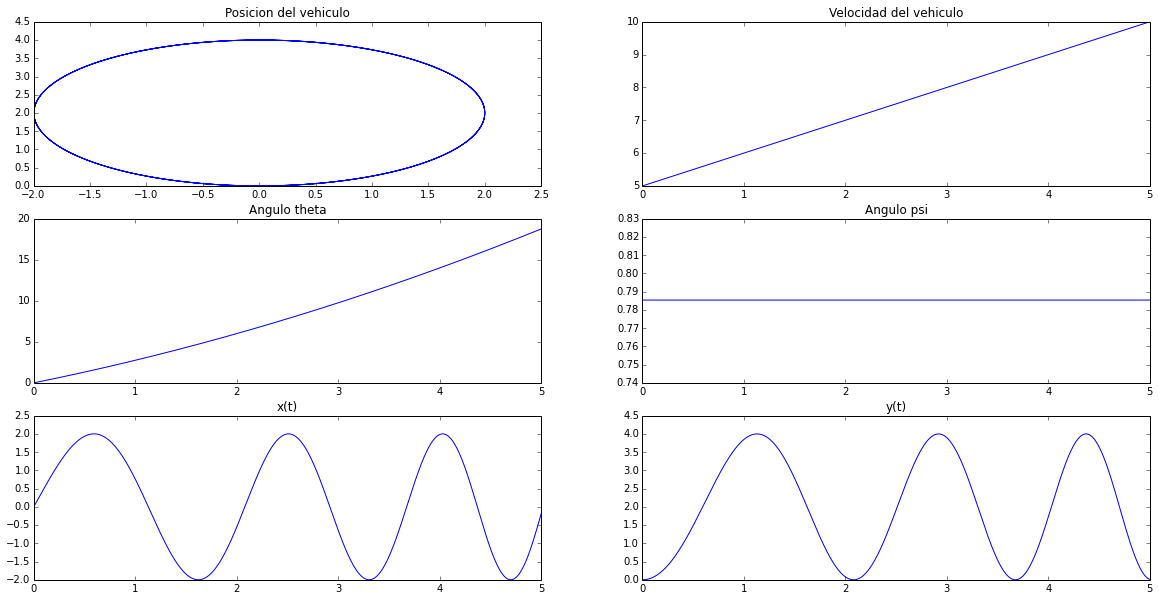

In [2]:
from IPython.html.widgets import interact, FloatSlider, interactive
from IPython.display import display
def graficar(a_0,a_1,a_2,a_3,b_0,b_1,b_2,b_3,x_0,y_0,theta_0):
    v = np.zeros(n)
    psi = np.zeros(n)
    v = a_0 + a_1 * t + a_2 * t**2 + a_3 * t**3
    psi = (b_0 + b_1 * t + b_2 * t**2 + b_3 * t**3)
    posicion(v,psi,theta_0,x_0,y_0)
a_0_slider = FloatSlider(min=-10, max=10, step=0.1, value=5, description='$a_0$')
a_1_slider = FloatSlider(min=-4, max=4, step=0.1, value=1, description='$a_1$')
a_2_slider = FloatSlider(min=-1, max=1, step=0.1, value=0, description='$a_2$')
a_3_slider = FloatSlider(min=-1, max=1, step=0.1, value=0, description='$a_3$')
b_0_slider = FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.05, value=np.pi/4, description='$b_0$')
b_1_slider = FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.05, value=0, description='$b_1$')
b_2_slider = FloatSlider(min=-1, max=1, step=0.1, value=0, description='$b_2$')
b_3_slider = FloatSlider(min=-1, max=1, step=0.1, value=0, description='$b_3$')
x_0_slider = FloatSlider(min=-10, max=10, step=0.1, value=0, description='$x_0$')
y_0_slider = FloatSlider(min=-10, max=10, step=0.1, value=0, description='$y_0$')
theta_0_slider = FloatSlider(min=-2*np.pi, max=2*np.pi, step=0.1, value=0,
                             description='$\\theta_0$')
w=interactive(graficar,a_0=a_0_slider,a_1=a_1_slider,a_2=a_2_slider,a_3=a_3_slider,
              b_0=b_0_slider, b_1=b_1_slider, b_2=b_2_slider, b_3=b_3_slider,
              x_0=x_0_slider, y_0=y_0_slider, theta_0=theta_0_slider)
display(w)